In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Magic command in python
%matplotlib inline
#setting the figure size of all the graphs 20 by 10 by default
plt.rcParams["figure.figsize"] = (20,10)

# Loading Data Set

In [2]:
data_frame = pd.read_csv("Real_estate_housing_data.csv")

# Pre-processing & Stats of Data 

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data_frame.shape

(13320, 9)

In [5]:
# Getting overview of Data by looking upto 5 rows
data_frame.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
#dropping the irrelevant rows with string entries using pandas function
data_frame.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns', inplace = True)

In [7]:
data_frame.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Analysis & Cleaning

In [8]:
#checking Null (NaN) values in columns
Null_Values=data_frame.isnull()
Null_Values.sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# dropna() function drops the null values from all columns of data set
improved_data_frame = data_frame.dropna()
improved_data_frame.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
improved_data_frame['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
improved_data_frame.shape

(13246, 5)

In [12]:
def int_separator(x):
    x = int(x.split(' ')[0])
    return x;

In [13]:
improved_data_frame['bedrooms'] = improved_data_frame['size'].apply(int_separator)

C:\Users\USMANJ~1\AppData\Local\Temp/ipykernel_18904/2941730271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improved_data_frame['bedrooms'] = improved_data_frame['size'].apply(int_separator)


In [14]:
improved_data_frame.bedrooms.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
improved_data_frame.head(5)

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
improved_data_frame[improved_data_frame.bedrooms>25]

,location,size,total_sqft,bath,price,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
# Irregularities in total_sqft column
def irregularity_checker(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
improved_data_frame[~improved_data_frame['total_sqft'].apply(irregularity_checker)]

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
#function to split the string and take average by converting string into floating numbers
def Average(i):
    List = i.split('-')
    if len(List)==2:
        return((float(List[0])+float(List[1]))/2)
        
    try:
        return float(i)
    except:
        return None

In [20]:
#copying data set into other variable so it cannot affect the original data set
improved_data_frame1 = improved_data_frame.copy()
improved_data_frame1.total_sqft = improved_data_frame1['total_sqft'].apply(Average)
improved_data_frame1 = improved_data_frame1[improved_data_frame1.total_sqft.notnull()]

In [21]:
improved_data_frame1.head(5)

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# High Dimensionality Problem

High dimentionality problem in the data set is the kind of problem in which data has some attributes which does not have great impact on mean or std of data set. Concatinating them into single attribute will not affect the data set as much. We solve this problem by simply removing or using them with single attribute.

In [22]:
#introducing new column of price per sqft
improved_data_frame2 = improved_data_frame1.copy()
# prices are in lac Rupees [1 Million = 10 Lac Rupees]
improved_data_frame2['price_per_sqft'] = improved_data_frame2.price*100000/improved_data_frame2.total_sqft
improved_data_frame2.head(5)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
def examineCatagoricalVariable(x):
    # strip() is used to remove extra spaces
    return x.strip()

In [24]:
improved_data_frame2.location = improved_data_frame2.location.apply(examineCatagoricalVariable)
#checking the frequency of different locations in locations Column and their contribution in the data
location = improved_data_frame2.groupby('location')['location'].agg('count')

In the location column you can see there are single value points which does not any significant impact on data set. They are only inreasing the computation time.

In [25]:
location.sort_values(ascending=False)

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [26]:
location_under_10 = location[location<=10]
len(location_under_10)

1047

In [27]:
len(improved_data_frame2.location.unique())

1287

In [28]:
def Dimentionality_reduction(x):
    if x in location_under_10:
        return 'other'
    else:
        return x

In [29]:
improved_data_frame2.location = improved_data_frame2.location.apply(Dimentionality_reduction)

In [30]:
#fetching all kinds of locations from locations column in a python list
improved_data_frame2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [31]:
len(improved_data_frame2.location.unique())

241

In [32]:
improved_data_frame2.shape

(13200, 7)

# Dealing with Outliers & Statistical Analysis

Outiers are the points which are not logically true values. They might be there due to multiple reasons like human error while collecting the data. These points needed to be remove to get true trend of data. In our data set there are some outliers such as there are points where prices of bedrooms apartment is higher than the price of 3 bedroom apartment for the same location and square feet value.
In normal distribution most of the values exist around the mean. We will remove the outliers by removing all the values away from (mean-standard deviation) & (mean + standard deviation) on the axis. You can see from the picture also that the probability of values existing around the mean is about 99.73%.

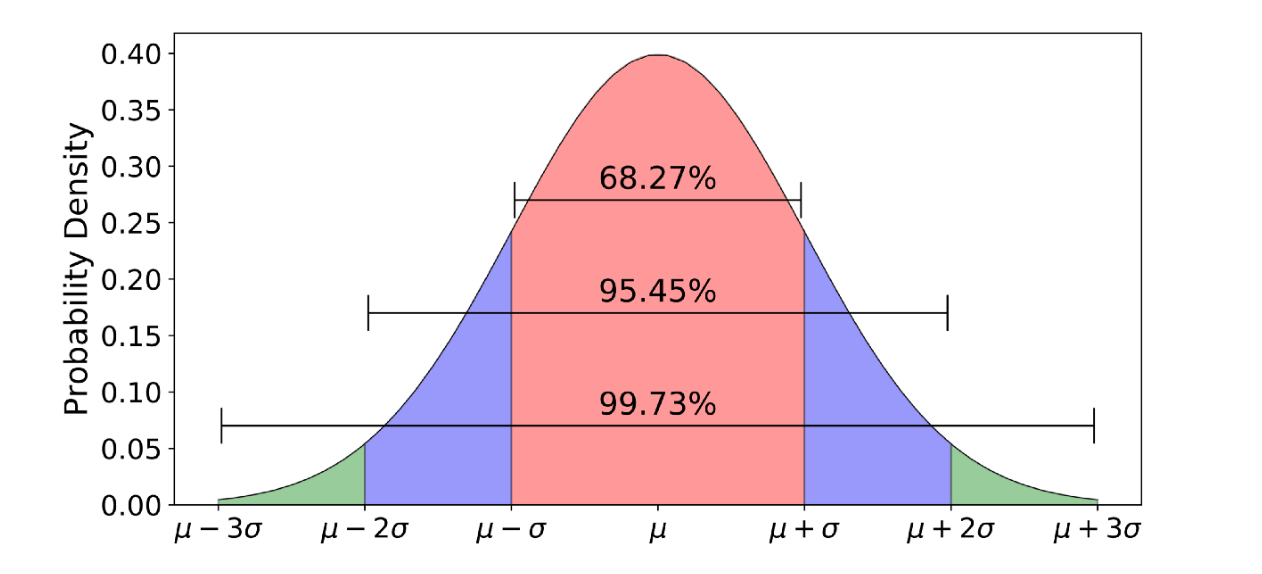

In [33]:
improved_data_frame2[improved_data_frame2.total_sqft/improved_data_frame2.bedrooms<300].head(10)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In order to understand outliers in our data set. Let's consider that the normal minimum square feet/bedroom is around 300. This threshold is market standard and set by real estate business men. Now you can see on row number 119 for 2 bedrooms is 276 which is logically wrong and is a outlier. We have to remove these outliers.

And look at row number 9 and 45. For 6 bedrooms sqaure feet is 1020. But for 8 bedrooms square feet is 600. These are absolute anomalies in the data.

In [34]:
# we will set a threshold and filter the outliers using one approach
improved_data_frame2 = improved_data_frame2[~(improved_data_frame2.total_sqft/improved_data_frame2.bedrooms<300)]

In [35]:
improved_data_frame2.shape

(12456, 7)

As described above, most of the values exist around mean of data. Now we will check mean of data of data and then remove all values other than the ones which exist around mean.

In [36]:
improved_data_frame2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Minimum and maximum prices per square feet can be seen. Now we will remove the outliers using mean and one standard deviation in which probability of occurance of every value other than outlier is around 99.73%

In [37]:
def Outliers_removal(data_frame):
    df_output = pd.DataFrame()
    for val, df in data_frame.groupby('location'):
        #using numpy to calculate mean and standard deviation
        m = np.mean(df.price_per_sqft)
        st = np.std(df.price_per_sqft)
        # condition from removing values that are one standard deviation away from x-axis 
        without_outliers_df = df[(df.price_per_sqft>(m-st)) & (df.price_per_sqft<=(m+st))]
        df_output = pd.concat([df_output,without_outliers_df],ignore_index=True)
    return df_output

In [38]:
improved_data_frame3 = Outliers_removal(improved_data_frame2)
improved_data_frame3.shape

(10242, 7)

There are like 10,242 rows and 7 columns. It is very difficult to have insight of data just by looking at numbers and few rows. We will use scatter plot to check anomalies in the square feet per bedroom|

# Visualization of Anomalies Using Matplotlib

In [39]:
import matplotlib
def Scatter_plot(df,location):
    #extracting all the data set for 2 bedrooms apartment from data
    two_bedrooms = df[(df.location==location) & (df.bedrooms==2)]
    #extracting all the data set for 2 bedrooms apartment from data
    three_bedrooms = df[(df.location==location) & (df.bedrooms==3)]
    #setting figure size of graph
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(two_bedrooms.total_sqft,two_bedrooms.price,color='red',label='2 bedrooms', s=50)
    plt.scatter(three_bedrooms.total_sqft,three_bedrooms.price,marker='+', color='blue',label='3 bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    #legend creates a box for indication on graph to difference between two plots based on their markers.
    plt.legend()

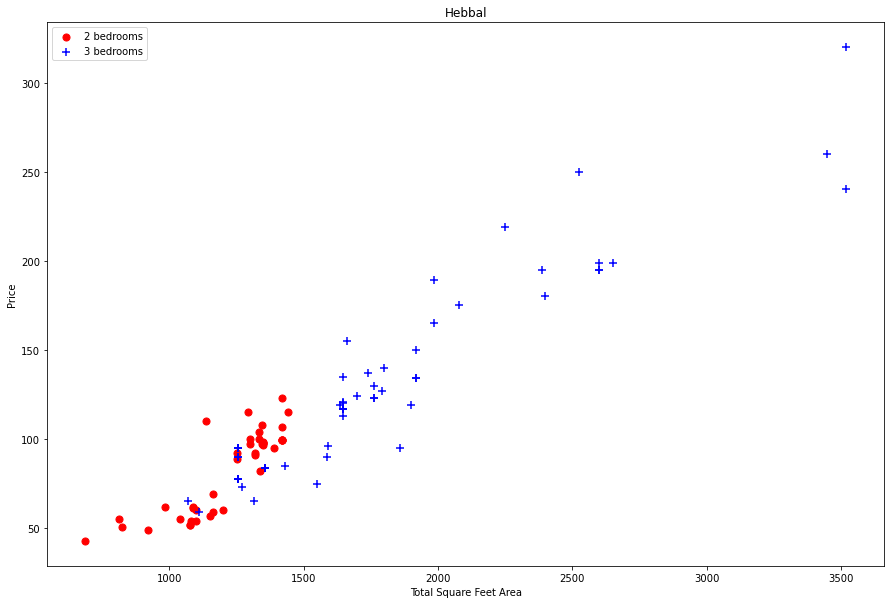

In [40]:
#Let's plot the graph for hebbal location
Scatter_plot(improved_data_frame3,"Hebbal")

In particular location the prices will be almost same for the 2 and 3 bedroom apartments. You can observe from the graph that red dots (2 bedrooms apartment) of around 1300 sqft has price greater than the blue markers (3 bedrooms) for same sqaure feet. Which is a clear problem in the data set. we need to remove this also.

In [41]:
def Bedrooms_Outlier_Removal(data_frame):
    array = np.array([])
    for location, location_df in data_frame.groupby('location'):
        bedrooms_stats = {}
        for bedroom, bedrooms_df in location_df.groupby('bedrooms'):
            bedrooms_stats[bedroom] = {
                'mean': np.mean(bedrooms_df.price_per_sqft),
                'std': np.std(bedrooms_df.price_per_sqft),
                'count': bedrooms_df.shape[0]
            }
        for bedroom, bedrooms_df in location_df.groupby('bedrooms'):
            stats = bedrooms_stats.get(bedroom-1)
            if stats and stats['count']>5:
                array = np.append(array, bedrooms_df[bedrooms_df.price_per_sqft<(stats['mean'])].index.values)
    return data_frame.drop(array,axis='index')

In [42]:
improved_data_frame4 = Bedrooms_Outlier_Removal(improved_data_frame3)

In [43]:
improved_data_frame4.shape

(7317, 7)

As all the outliers are removed because we remove all the values of bedrooms which have price less than the mean price of 1 bedroom apartment

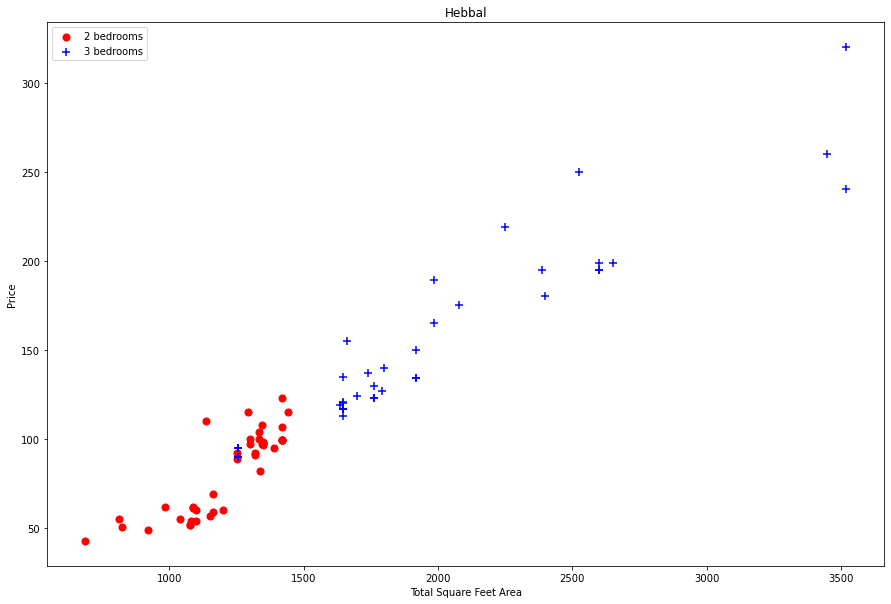

In [44]:
#Plot after outlier removal
Scatter_plot(improved_data_frame4,"Hebbal")

Now we can see almost all the outliers are removed. All the values are logical in the data set

Now we will see the type of distribution, kurtosis and skewness of our data using prices per square feet

Text(0, 0.5, 'Count')

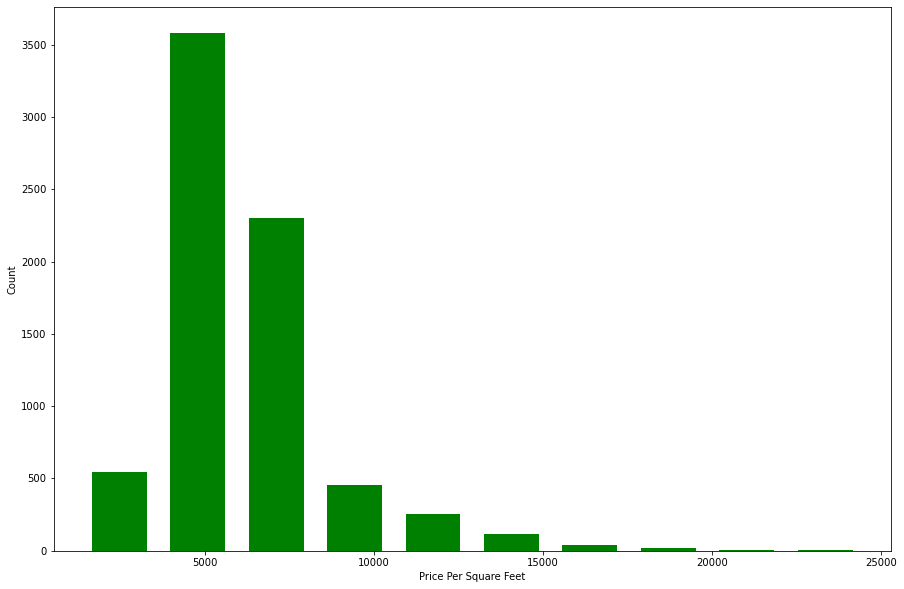

In [45]:
plt.hist(improved_data_frame4.price_per_sqft,rwidth=0.7, color = 'g')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


We can clearly see from the histogram that, most of the aparments are of 2 bedrooms with price per square feet 5000. Graph depicts that distribution is Normal and kurtosis is leptokurtic and it is negatively Skewed because most of the data exist before mean 

In [46]:
# Removing outliers in bath column
improved_data_frame5 = improved_data_frame4[improved_data_frame4.bath<improved_data_frame4.bedrooms+2]
improved_data_frame5.shape

(7239, 7)

# 1NF (First Normal Form) After Pre-processing and Analysis

In [47]:
final_data_frame = improved_data_frame5.drop(['size','price_per_sqft'], axis = 'columns')

In [48]:
final_data_frame.head()

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


We have dropped the size column because and we have already created separate column bedrooms for that by extracting integer value from it. The price per square feet is also dropped because it was only created to detect and remove outliers. 

# Building Machine Learning Model

Now we have a column of locations which has strings. As we know ML model does not work with strings. We need to some how convert it into integers. We will use the very famous technique of one hot encoding. For each row we will give integer value of 1 to that location row and will assign integer value 0 to other locations. We will do this each row.

You can learn more about that from the following link: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [49]:
Encoded_data = pd.get_dummies(final_data_frame.location)

In [50]:
Encoded_data.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
raw_frame = pd.concat([final_data_frame,Encoded_data.drop('other',axis='columns')],axis='columns')

In [52]:
raw_frame.shape

(7239, 245)

In [53]:
final_data_set = raw_frame.drop('location', axis = 'columns')
final_data_set.head(5)

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can now remove the location column because it is one hot encoded and is useless for us

# Linear Regression Model

As we know this is a supervised learning problem. So, we will define the input as X and output as Y

In [54]:
X = final_data_set.drop("price", axis='columns')
X.head(5)

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = final_data_set.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [57]:
# Data Set is divided into 25% testing and 75% training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [58]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [59]:
# Accuracy on training data with one iteration
model.score(X_train,y_train)*100

85.9230348998018

In [60]:
# Accuracy on testing data with one iteration
model.score(X_test,y_test)*100

82.77627346186323

# Accuracy Scores and Outputs Using Cross Validation

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=200, test_size=0.2, random_state=0)
arr = cross_val_score(LinearRegression(), X, y, cv=cv)
np.argmax(arr)

130

In [62]:
# Final Accuracy of Model Using K Fold Cross Validation- on 200 splits
arr[np.argmax(arr)]*100

89.56591861282574

In [63]:
final_data_set.describe()

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
count,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,...,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000
mean,1470.676319,2.413179,96.546676,2.483768,0.000967,0.002210,0.001105,0.000553,0.000829,0.003315,...,0.004006,0.000553,0.000553,0.004282,0.032877,0.001520,0.011880,0.003315,0.001105,0.005111
std,815.327820,0.938800,87.732734,0.908941,0.031083,0.046965,0.033227,0.023502,0.028780,0.057488,...,0.063171,0.023502,0.023502,0.065304,0.178328,0.038954,0.108354,0.057488,0.033227,0.071315
min,300.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1092.000000,2.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1255.000000,2.000000,72.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1654.500000,3.000000,110.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,16.000000,2200.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
